In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

**Câu 20: Tìm hiểu PCA và cài đặt: https://machinelearningcoban.com/2017/06/21/pca2/  
Sử dụng thư viện python và tập dữ liệu iris để thực hành PCA. Xác định số thành phần chính sao cho lượng tin giữ lại đạt 95%.**

In [ ]:
df = pd.read_csv("/content/iris.csv")

In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df = pd.get_dummies(df, columns= ['species'], drop_first=True)

In [ ]:
x = df.to_numpy()

In [ ]:
x = x.astype(float)

In [ ]:
x_mean = np.mean(x, axis = 0)
x_std = np.std(x, axis = 0)
x_norm = (x - x_mean)/x_std

In [ ]:
cov_mat = np.cov(x_norm.T)
eigvl, eigvt = np.linalg.eig(cov_mat)

In [ ]:
Sortvt = np.argsort(eigvl)[::-1]
eigvl = eigvl[Sortvt]
eigvt = eigvt[:, Sortvt]

In [ ]:
ft = eigvl/np.sum(eigvl)
Tong = np.cumsum(ft)
n = np.argmax(Tong >= 0.95) + 1


In [ ]:
print(f"số thành phần chính cần giữ lại là: {n} so với 5 feature ban đầu(kể cả species)")

số thành phần chính cần giữ lại là: 3 so với 5 feature ban đầu(kể cả species)


Câu 21:  (CA) Tìm hiểu k-mean và cài đặt trong python: https://machinelearningcoban.com/2017/01/01/kmeans/

In [ ]:
np.random.seed(42)
means = [[2,2], [8,3], [3,6]]
cov = [[1,0], [0, 1]]
N = 500

In [ ]:
x1 = np.random.multivariate_normal(means[0], cov, N)
x2 = np.random.multivariate_normal(means[1], cov, N)
x3 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((x1, x2, x3), axis=0)
K = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [ ]:
def display(x, labels):
    plt.figure(figsize=(8,6))
    plt.scatter(x[:, 0], x[:,1], c=labels, cmap='viridis', s=10, alpha=0.6)
    plt.title("Phân cụm K-mean")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

def init_centers(x, k):
    return x[np.random.choice(x.shape[0], k, replace=False)]

def assign_labels(x, centers):
    # Tính khoảng cách từ mọi điểm đến mọi tâm
    D = cdist(x, centers)
    # Trả về index của tâm có khoảng cách nhỏ nhất
    return np.argmin(D, axis=1)

def update_centers(x, labels, k):
    centers = np.zeros((k, x.shape[1]))
    for i in range(k):
        # Lấy các điểm thuộc cụm i
        xi = x[labels == i,:]
        # Nếu cụm không rỗng thì tính trung bình, ngược lại giữ nguyên hoặc random lại
        if len(xi) > 0:
            centers[i, :] = np.mean(xi, axis=0)
        else:
            # Xử lý trường hợp cụm rỗng
            pass
    return centers

def has_converged(centers, new_centers):
    return np.allclose(centers, new_centers, atol=1e-4)

In [ ]:
def kmeans(x, k):
    # 1. Khởi tạo tâm
    centers = [init_centers(x, k)]
    labels = []
    it = 0
    while True:
        # 2. Gán nhãn
        current_labels = assign_labels(x, centers[-1])
        labels.append(current_labels)

        # 3. Cập nhật tâm
        new_centers = update_centers(x, current_labels, k)

        # 4. Kiểm tra hội tụ
        if has_converged(centers[-1], new_centers):
            print(f"Thuật toán hội tụ tại vòng lặp thứ {it}")
            break

        centers.append(new_centers)
        it += 1

        # dừng nếu số lần lặp quá nhiều
        if it > 1000:
            print("Đã đạt giới hạn vòng lặp tối đa.")
            break

    return centers, labels, it

Thuật toán hội tụ tại vòng lặp thứ 3


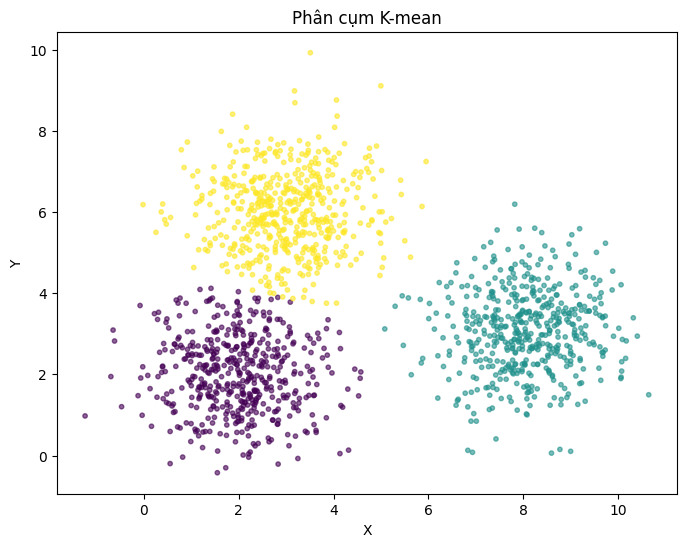

In [ ]:
centers, labels, iterations = kmeans(X, K)
display(X,labels[-1])

In [ ]:
for i, center in enumerate(centers[-1]):
    print(f"Cụm {i}: {center}")


Cụm 0: [1.98379957 1.99683971]
Cụm 1: [8.06633167 3.06841999]
Cụm 2: [3.00188698 6.00855841]


Câu 22: Kiểm định phi tham số

Một quản lý của siêu thị A công bố rằng phân phối của lượng khách hàng tới trong tuần theo bảng phân bố - Lý thuyết sau. Và theo quan sát thu nhận được ta có bảng phân bố - Quan sát thực tế. Hãy kiểm tra xem người quản lý nói đúng hay sai với độ tin cậy 1- alpha = 90%





| Hoạt động        | Thứ 2 | Thứ 3 | Thứ 4 | Thứ 5 | Thứ 6 | Thứ 7 | Chủ Nhật | Tổng |
|------------------|-------|-------|-------|-------|-------|-------|----------|------|
| Lý thuyết        | 125   | 80    | 73    | 90    | 66    | 110   | 156      | 700  |
| Quan sát thực tế | 110   | 90    | 75    | 95    | 55    | 95    | 130      | 650  |


In [1]:
import numpy as np
from scipy.stats import chi2

In [4]:
#H0: phân phối quan sát không phù hợp lí thuyết
#H1: phân phối quan sát phù hợp lí thuyết
LiThuyet = np.array([125, 80, 73, 90, 66, 110, 156])
ThucTe = np.array([110, 90, 75, 95, 55, 95, 130])

In [5]:
LiThuyet_Scale = LiThuyet * ThucTe.sum()/LiThuyet.sum()
chi = np.sum((ThucTe - LiThuyet_Scale)**2/LiThuyet_Scale)
x = len(ThucTe) -1 #bậc tự do
alpha = 0.1
chi_cr = chi2.ppf(1-alpha, x)


In [6]:
if chi > chi_cr:
  print("Bác bỏ H0: Phân phối quan sát KHÔNG phù hợp với lý thuyết.")
else:
  print("Không bác bỏ H0")

Không bác bỏ H0
